# Figure 6: Profile over Time of Command-Line CSV Import 

Profile of the workload over time ingesting 1.6 billion entries from 1797 harvested CSV files.
We include our measurements and the code to generate the figures.

### Prerequisites

To recreate the figure only the dependencies along with the datasets in "../data/figure5" are required.

Ensure the following imports work:

In [14]:
import pandas as pd
import humanize
import seaborn as sns
import matplotlib.pylab as plt
import glob

Specify data path (default is measurements series used in the paper):

In [9]:
DATA_DIR = "../data/figure6/"

## Loading and Preparing the Data

In [15]:
lst = glob.glob(f"{DATA_DIR}/*/*.csv")
lst

['../data/figure6/2022-08-24T00:45:32.655277_m3.medium_gladly-united-swift/measurements_cmdline_ingest.csv',
 '../data/figure6/2022-08-31T00:49:38.286420_m3.quad_blatantly-intense-bison/measurements_cmdline_ingest.csv',
 '../data/figure6/2022-08-31T07:56:56.839123_m3.large_generally-dashing-mollusk/measurements_cmdline_ingest.csv',
 '../data/figure6/2022-08-31T08:52:30.274943_m3.xl_roughly-renewed-buzzard/measurements_cmdline_ingest.csv',
 '../data/figure6/2022-08-31T10:02:04.207596_m3.2xl_simply-talented-pangolin/measurements_cmdline_ingest.csv',
 '../data/figure6/2022-08-31T15:05:10.206125_m3.tiny_jointly-cute-heron/measurements_cmdline_ingest.csv',
 '../data/figure6/2022-08-31T17:13:24.111538_m3.small_heavily-new-piglet/measurements_cmdline_ingest.csv']

In [16]:
def get_info_from_filename(filename):
    info =  filename.split("/")[-2].split("_")
    print(info)
    return info


totals = []

dfs = []

for filename in lst:
    df = pd.read_csv(filename)
    
    filename_info = get_info_from_filename(filename)
    
    df.columns = ["Filename", "Filesize", "Entries", "Start", "End"]

    df["Start"] = pd.to_datetime(df["Start"])
    df["End"] = pd.to_datetime(df["End"])

    df["Elapsed (s)"] = (df["End"] - df["Start"]).apply(lambda x: x.total_seconds())

    df["Entries/s"] = df["Entries"] / df["Elapsed (s)"]

    df["Index Size"] = df["Entries"].cumsum()
    dfs.append(df)
    
    
    
    totals_entry = {
        "Start": df["Start"].min(),
        "End": df["Start"].max(),
        "Instance Type": filename_info[1],
        "Experiment": "_".join(filename_info)
    } 
    totals_entry["Elapsed"] =  (totals_entry["End"] - totals_entry["Start"]).total_seconds() 
    
    totals.append(totals_entry)

['2022-08-24T00:45:32.655277', 'm3.medium', 'gladly-united-swift']
['2022-08-31T00:49:38.286420', 'm3.quad', 'blatantly-intense-bison']
['2022-08-31T07:56:56.839123', 'm3.large', 'generally-dashing-mollusk']
['2022-08-31T08:52:30.274943', 'm3.xl', 'roughly-renewed-buzzard']
['2022-08-31T10:02:04.207596', 'm3.2xl', 'simply-talented-pangolin']
['2022-08-31T15:05:10.206125', 'm3.tiny', 'jointly-cute-heron']
['2022-08-31T17:13:24.111538', 'm3.small', 'heavily-new-piglet']


## Generating the Figure

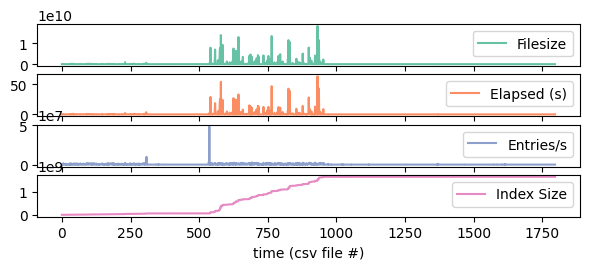

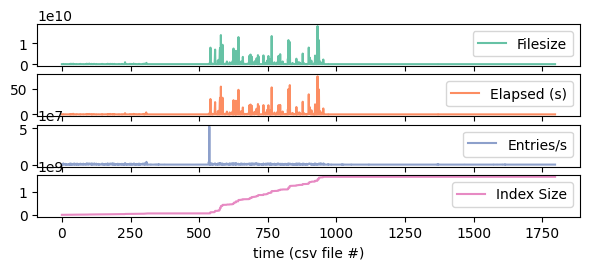

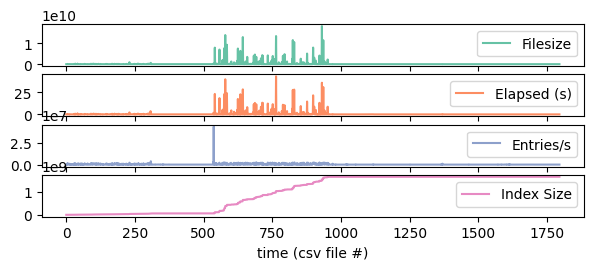

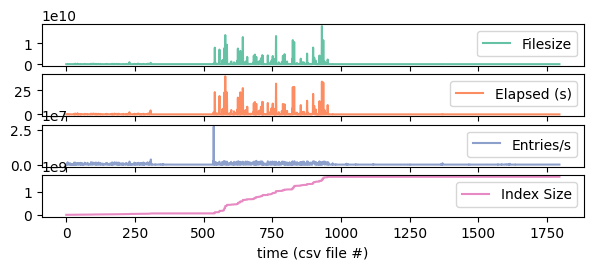

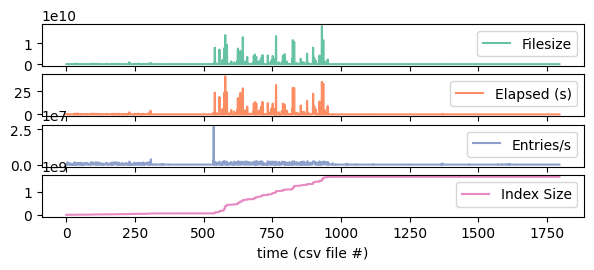

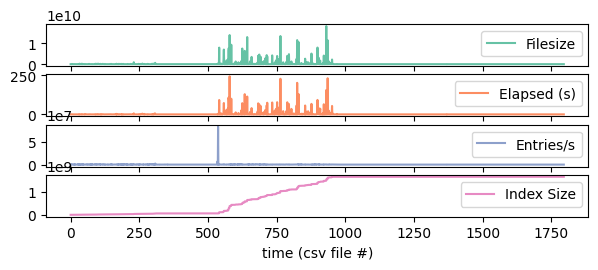

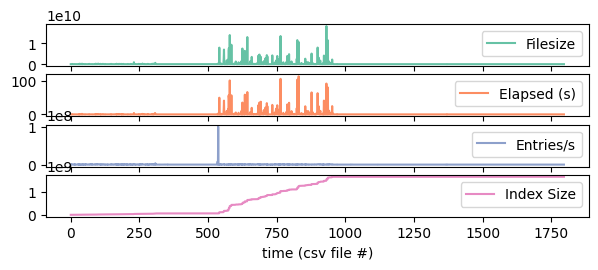

In [17]:
sizemap = {
    "large": 0,
    "medium": 1,
    "small": 2, 
    "tiny": 3,
    "xl": 4,
    "2xl": 5,
    "quad": 6
}

instance_type = "2xl"

import seaborn as sns
import humanize
from matplotlib import rcParams
import matplotlib.pylab as plt

for instance_type, idx in sizemap.items():

    rcParams['figure.figsize'] = (7, 2.5)
    sns.set_palette("Set2")

    tmp_df = dfs[sizemap[instance_type]][["Filesize", "Elapsed (s)", "Entries/s", "Index Size"]]

    ax = tmp_df.plot(
        subplots=True, 
        sharey=False,
        xlabel="time (csv file #)"
    )


    plt.show()